# Risk Factor Clinical Classifier

This classifier takes patient answers to the Lung Space clinical survey and predicts the chance of cancer.

In [7]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize

df = pd.read_csv('../data/lungspace/package-nlst-1193.2024-02-20/participant_d040722.csv')

# Breakdown of positive and negative sample size
print("positive: ", len(df['lung_cancer'].loc[df['lung_cancer'] == 1].to_list()), " negative: ", len(df['lung_cancer'].loc[df['lung_cancer'] == 0].to_list()))


positive:  2058  negative:  51394


/tmp/ipykernel_2157/547569613.py:8: DtypeWarning: Columns (239,240,348) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/lungspace/package-nlst-1193.2024-02-20/participant_d040722.csv')


In [8]:
# List of features
# print(df.columns.to_list())

dataset_columns = ['age', 'weight', 'height', "cigar","cigsmok","pipe","pkyr","smokeage","smokeday","smokelive","smokework","smokeyr","num_screens", "lung_cancer"]

df = df[dataset_columns]
df = df.dropna()
df = df.drop(df.query('lung_cancer == 0').sample(frac=.95).index)

df = df[df[dataset_columns] >= 0]
print(df.loc[df.apply(lambda row: all(value < 0 for value in row), axis=1)])
df = df.dropna()

# lung_cancer_col = df['lung_cancer']

# df = normalize(df, axis=0)
# df = pd.DataFrame(df, columns=dataset_columns)

# df['lung_cancer'] = lung_cancer_col

# print(df)

# print(df.loc[df["lung_cancer"] != 0]['lung_cancer'])


Empty DataFrame
Columns: [age, weight, height, cigar, cigsmok, pipe, pkyr, smokeage, smokeday, smokelive, smokework, smokeyr, num_screens, lung_cancer]
Index: []


## Define models

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    # "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    # "Random Forest",
    # "Neural Net",
    # "AdaBoost",
    "Naive Bayes",
    # "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    # SVC(gamma=2, C=1, random_state=42),
    # GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    # RandomForestClassifier(
    #     max_depth=5, n_estimators=10, max_features=1, random_state=42
    # ),
    # MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    # AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    # QuadraticDiscriminantAnalysis(),
]

# print(df)

X = df[['age', 'weight', 'height', "cigar","cigsmok","pipe","pkyr","smokeage","smokeday","smokelive","smokework","smokeyr","num_screens"]]
y = df[['lung_cancer']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

print(y_train)
print(y_test)

print("positive training sample: ", len(list(filter(lambda x: x == 1.0, y_train['lung_cancer'].to_list()))))
print("negative training sample: ", len(list(filter(lambda x: x == 0.0, y_train['lung_cancer'].to_list()))))
print("positive training sample: ", len(list(filter(lambda x: x == 1.0, y_test['lung_cancer'].to_list()))))
print("negative training sample: ", len(list(filter(lambda x: x == 0.0, y_test['lung_cancer'].to_list()))))


       lung_cancer
42360            1
18660            1
18999            0
31127            0
47915            1
...            ...
52355            1
5576             1
36985            0
44801            1
10056            1

[2718 rows x 1 columns]
       lung_cancer
28890            0
11355            1
39769            0
28148            0
42031            0
...            ...
10953            1
47765            0
6559             1
33092            0
48641            0

[1813 rows x 1 columns]
positive training sample:  1193
negative training sample:  1525
positive training sample:  815
negative training sample:  998


## Test models and plot confusion matrices

The goal is to minimize the number of false negative predictions.

/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model:  Nearest Neighbors  score:  0.6442360728075014
Model:  Linear SVM  score:  0.6878102592388307
Model:  Decision Tree  score:  0.694980694980695
Model:  Naive Bayes  score:  0.6596800882515168


/home/codespace/.python/current/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


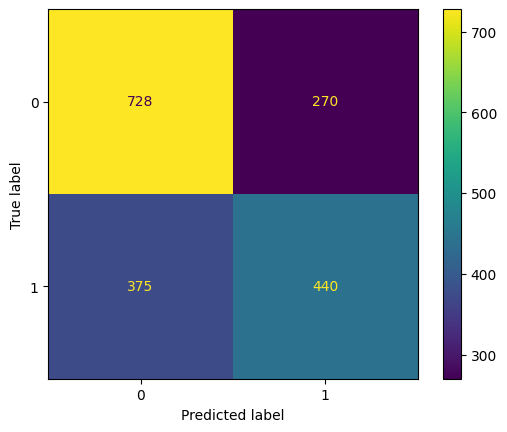

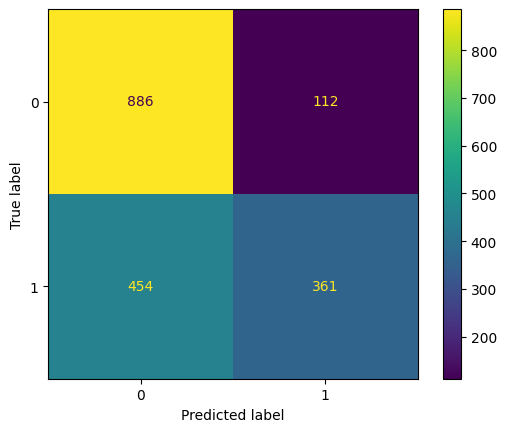

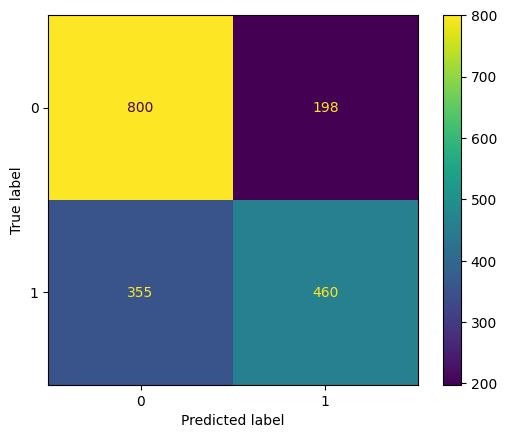

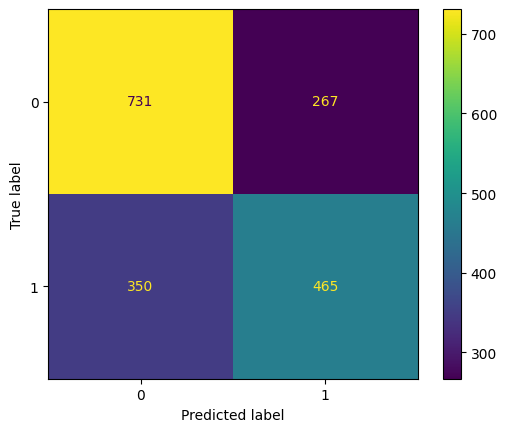

In [10]:
for name, clf in zip(names, classifiers):
  clf = make_pipeline(StandardScaler(), clf)
  clf.fit(normalize(X_train), y_train)
  y_pred = clf.predict(normalize(X_test))

  score = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
  disp.plot()
  # score = clf.score(X_test, y_test)
  print("Model: ", name, " score: ", score)


## Get confidence of each prediction with `predict_proba()`

Empty DataFrame
Columns: [age, weight, height, cigar, cigsmok, pipe, pkyr, smokeage, smokeday, smokelive, smokework, smokeyr, num_screens]
Index: []
[[0.06666667 0.93333333]
 [0.08510638 0.91489362]
 [0.86666667 0.13333333]
 ...
 [0.86666667 0.13333333]
 [0.         1.        ]
 [0.8013245  0.1986755 ]]
Model:  Naive Bayes  score:  0.6596800882515168


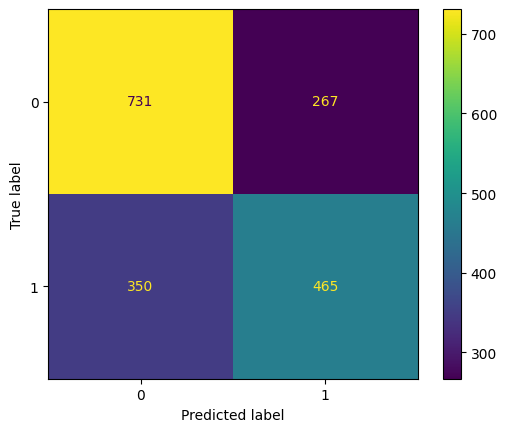

In [38]:
# model = SVC(kernel="linear", C=0.025, random_state=42, probability=True)
model = DecisionTreeClassifier(max_depth=10, random_state=42)

model = make_pipeline(StandardScaler(), model)
# print(X_train.loc[X_train.apply(lambda row: all(value >= 0 for value in row), axis=1)])
# print(y_train.loc[y_train.apply(lambda row: all(value >= 0 for value in row), axis=1)])
# ['age', 'weight', 'height', "cigar","cigsmok","pipe","pkyr","smokeage","smokeday","smokelive","smokework","smokeyr","num_screens"]
print(X_train[X_train['num_screens'] < 0])
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)

print(y_pred_prob)

y_pred = clf.predict(normalize(X_test))

score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot()
# score = clf.score(X_test, y_test)
print("Model: ", name, " score: ", score)


## Compare compare the probabilities of false positives and false negatives to true positives and true negatives

In [34]:
true_negative_probs = []
false_negative_probs = []
true_positive_probs = []
false_positive_probs = []

y_pred_list = y_pred.tolist()
y_pred_prob_list = y_pred_prob.tolist()
y_test_list = y_test['lung_cancer'].tolist()

for i in range(len(y_test)):
  # true negative
  if y_pred_list[i] == 0 and y_test_list[i] == 0:
    true_negative_probs.append(y_pred_prob_list[i][0])
  # false negative
  elif y_pred_list[i] == 0 and y_test_list[i] == 1:
    false_negative_probs.append(y_pred_prob_list[i][0])
  # true positive
  elif y_pred_list[i] == 1 and y_test_list[i] == 1:
    true_positive_probs.append(y_pred_prob_list[i][1])
  # false positive
  else:
    false_positive_probs.append(y_pred_prob_list[i][1])


## Plot the probabilities that led to the different predictions. 

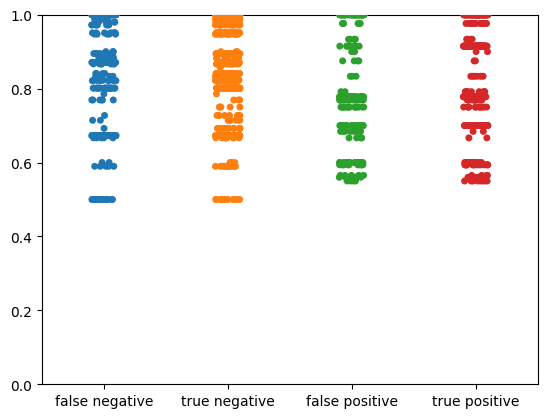

In [35]:
data = {'false negative': false_negative_probs,
               'true negative': true_negative_probs,
               'false positive': false_positive_probs,
               'true positive': true_positive_probs,
              }
cols = ['false negative', 'true negative', 'false positive', 'true positive']

df = pd.DataFrame.from_dict(
    data=dict(data),
    orient='index',
).T

fig, ax = plt.subplots()

ax = sns.stripplot(data=df)
ax.set_ylim(0, 1)

# sns.stripplot(ax = ax,
#               data = data,
#               x = 'probability',
#               y = 'predictions')

plt.show()


In [41]:
print(model.best_estimator_._final_estimator.feature_importances_)


# def print_top10(vectorizer, clf, class_labels):
#   """Prints features with the highest coefficient values, per class"""
#   feature_names = vectorizer.get_feature_names_out()
#   for i, class_label in enumerate(class_labels):
#       top10 = np.argsort(clf.coef_[i])[-10:]
#       print("%s: %s" % (class_label,
#             " ".join(feature_names[j] for j in top10)))

# training_labels = ['age', 'weight', 'height', "cigar","cigsmok","pipe","pkyr","smokeage","smokeday","smokelive","smokework","smokeyr","num_screens"]

# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()

# print_top10(vectorizer, model, training_labels)


# neg_class_prob_sorted = model.feature_log_prob_[0, :].argsort()[::-1]
# pos_class_prob_sorted = model.feature_log_prob_[1, :].argsort()[::-1]

# print(np.take(['age', 'weight', 'height', "cigar","cigsmok","pipe","pkyr","smokeage","smokeday","smokelive","smokework","smokeyr","num_screens"], neg_class_prob_sorted[:10]))
# print(np.take(['age', 'weight', 'height', "cigar","cigsmok","pipe","pkyr","smokeage","smokeday","smokelive","smokework","smokeyr","num_screens"], pos_class_prob_sorted[:10]))


AttributeError: 'Pipeline' object has no attribute 'best_estimator_'